<a href="https://colab.research.google.com/github/Kevin-Yau/CHL5230/blob/main/Datathon_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Read the dataset into a Pandas DataFrame
df = pd.read_csv('mhealth.csv')

In [60]:
# read dataset
wear_df = pd.read_csv('mhealth.csv')
wear_df.head()

# check dimension of the dataset
print(wear_df.shape)

# list the columns of the dataframe
print(wear_df.columns)



(971971, 14)
Index(['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
       'gry', 'grz', 'Activity', 'subject'],
      dtype='object')


In [61]:
wear_df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0.0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0.0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0.0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0.0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0.0,subject1


In [46]:
# Group the dataset by the 'subject' column and apply the `len` function
# to each group. This counts the number of records for each patient.
# The result is a series where the index is 'subject' and the value is the count of records.
patients_with_2_or_more_records = (wear_df.groupby('subject').apply(len) >= 2)


In [47]:

# Filter the original dataset to include only those patients who have 2 or more records.
# This is done by first creating a boolean series `patients_with_2_or_more_records` where the index is 'patient_nbr'
# and the value is True if the patient has 2 or more records, False otherwise.
# Then, using `isin` method to filter `Mobile Health Data` so that it only includes rows where 'subject'
# matches those in the `patients_with_2_or_more_records` series that are True.
patients_with_2_or_more_records_df = wear_df[wear_df['subject'].isin(patients_with_2_or_more_records[patients_with_2_or_more_records].index)]

In [48]:
# Update the original 'wear_df' dataframe with the filtered dataframe.
# This step replaces the original dataset with the subset of patients who have 2 or more records.
wear_df = patients_with_2_or_more_records_df

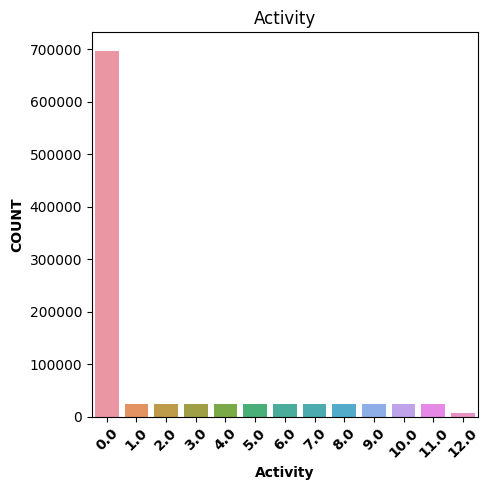

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns


# New color palette
new_colors = ["#eaac8b", "#e56b6f", "#b56576", "#6d597a", "#355070"]  # A more varied color palette
sns.set_palette(sns.color_palette(new_colors))

# Activity Distribution with updated color palette
plt.figure(figsize=(5, 5))
sns.countplot(x='Activity', data=wear_df)
plt.title('Activity')
plt.xlabel('Activity', fontweight='bold')
plt.ylabel('COUNT', fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
updated_race_distribution_fig = plt.gcf()
plt.show()

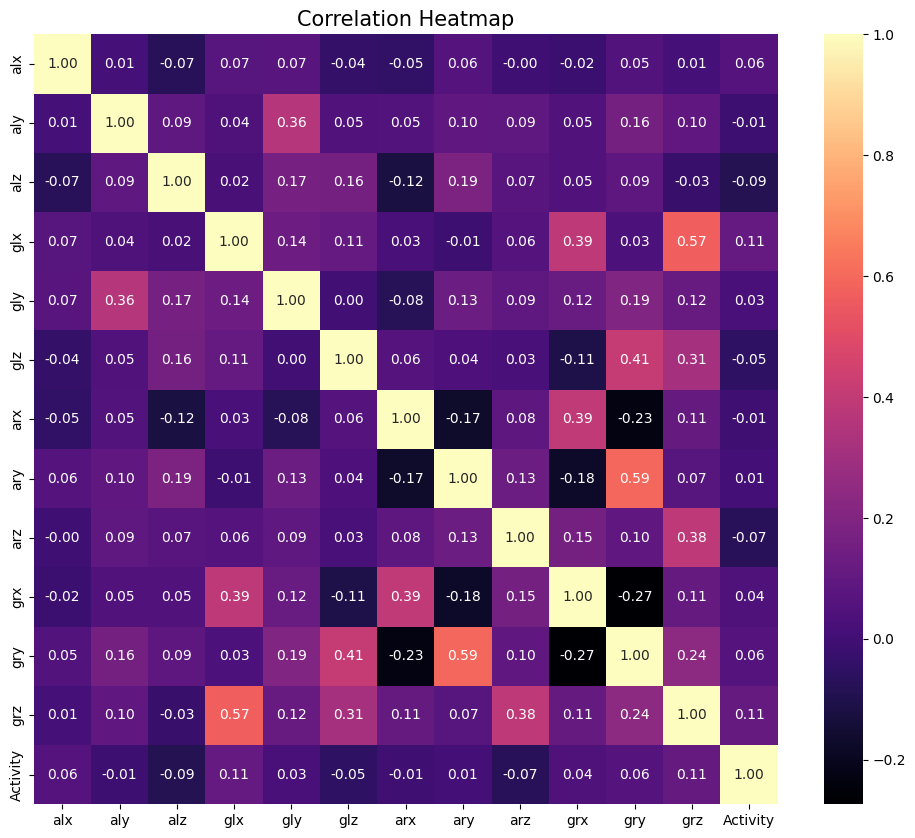

In [63]:
import numpy as np

# For the correlation heatmap, we'll use only numerical columns.
# We'll update the list of numerical features to exclude columns with '_id' in their names.
numerical_features = [
    col for col in wear_df.select_dtypes(include=[np.number]).columns
    if not col.endswith('_id')
]

# Recalculate the correlation matrix without the '_id' columns
correlation_matrix = wear_df[numerical_features].corr()

# Plot the updated correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='magma')
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

<Axes: >

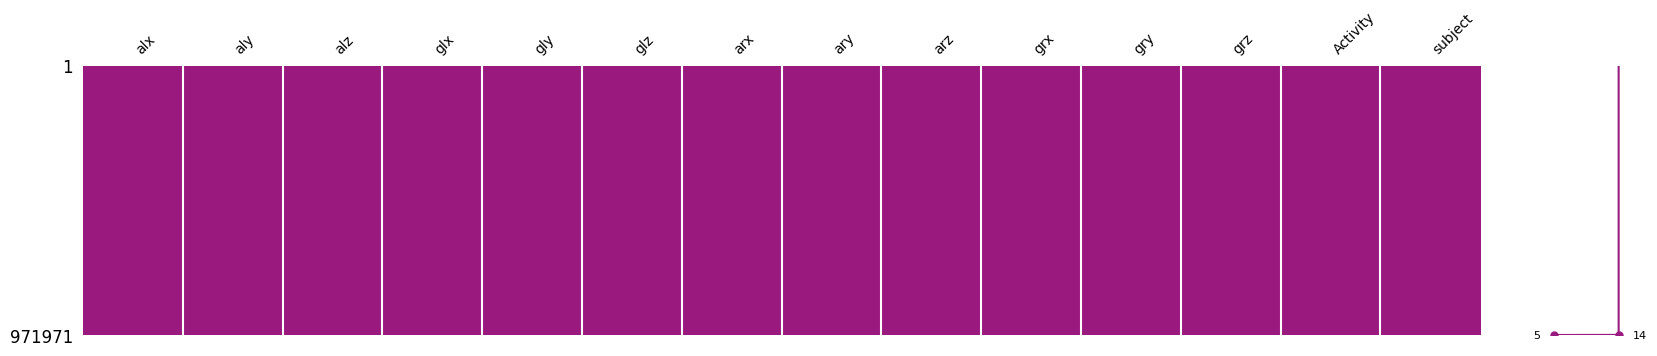

In [64]:
# !pip install missingno
import missingno as msno

# Visualize missing values as a matrix
msno.matrix(wear_df, figsize=(20,3.5), fontsize=10, color=(.6,.1,0.5))

In [20]:
#Encoding Categorical Data

# Identifying categorical columns excluding 'readmitted'
categorical_columns = wear_df.select_dtypes(include=['object']).columns.tolist()

# Applying one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(wear_df, columns=categorical_columns)

# Displaying the shape of the new dataframe
df_encoded_shape = df_encoded.shape
df_encoded_shape


(75468, 14)

In [65]:
from sklearn.model_selection import train_test_split

# Grouping by 'subject' and creating a list of dataframes, one per group
grouped = wear_df.groupby('subject')
grouped_dfs = [group for _, group in grouped]

# Splitting the groups into training and test sets with an 80:20 ratio
train_groups, test_groups = train_test_split(grouped_dfs, test_size=0.2, random_state=42)

# Reassembling the training and test datasets from the groups
train_df = pd.concat(train_groups)
test_df = pd.concat(test_groups)

# Displaying the shape of the training and test sets
train_df_shape = train_df.shape
test_df_shape = test_df.shape

train_df_shape, test_df_shape

((743105, 14), (228865, 14))

In [78]:
#Normalization Step - should not be normalizing the patient ID

from sklearn.preprocessing import StandardScaler

# Identifying numerical columns (excluding 'subject'')
numerical_columns = train_df.select_dtypes(include=['int64', 'float64','object']).columns.tolist()
numerical_columns.remove('subject')
numerical_columns.remove('Activity')
# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming both training and test data
train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])

# Checking the first few rows of the normalized training data
train_df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,0.219625,-0.022579,0.309582,0.234488,-0.673475,-1.044082,-1.105153,0.238603,-0.609096,-0.336557,-1.016512,-0.495991,0.0,subject1
1,0.272455,0.023272,0.319557,0.197850,-0.668060,-1.036891,-1.100533,0.284377,-0.651247,-0.336557,-1.016512,-0.495991,0.0,subject1
2,0.277928,0.008839,0.319039,0.197850,-0.668060,-1.036891,-1.075367,0.291926,-0.586511,-0.336557,-1.016512,-0.495991,0.0,subject1
3,0.218713,0.042201,0.294472,0.197850,-0.668060,-1.036891,-1.100615,0.284997,-0.562941,-0.351010,-1.012728,-0.511739,0.0,subject1
4,0.280196,0.052211,0.324645,0.197850,-0.668060,-1.036891,-1.115653,0.315194,-0.552729,-0.351010,-1.012728,-0.511739,0.0,subject1


In [81]:
# Addressing Class Imbalance
# Checking the class distribution in the 'Activity' column of the training set
class_distribution = train_df.groupby('subject').apply(lambda x : x.iloc[-1]['Activity']).value_counts()
class_distribution

0.0    6
dtype: int64

In [82]:
train_df[train_df['subject'] == 582840]['Activity']

len(train_df['subject'].unique())


6

In [84]:
from sklearn.utils import resample

# Grouping the original training data by 'subject'
grouped_by_patient = train_df.groupby('subject')

# Creating separate lists for each class
groups_class_0 = [grouped_by_patient.get_group(patient) for patient in grouped_by_patient.groups if grouped_by_patient.get_group(patient)['Activity'].iloc[-1] == 0]
groups_class_1 = [grouped_by_patient.get_group(patient) for patient in grouped_by_patient.groups if grouped_by_patient.get_group(patient)['Activity'].iloc[-1] == 1]
groups_class_2 = [grouped_by_patient.get_group(patient) for patient in grouped_by_patient.groups if grouped_by_patient.get_group(patient)['Activity'].iloc[-1] == 2]
groups_class_3 = [grouped_by_patient.get_group(patient) for patient in grouped_by_patient.groups if grouped_by_patient.get_group(patient)['Activity'].iloc[-1] == 3]
groups_class_4 = [grouped_by_patient.get_group(patient) for patient in grouped_by_patient.groups if grouped_by_patient.get_group(patient)['Activity'].iloc[-1] == 4]
groups_class_5 = [grouped_by_patient.get_group(patient) for patient in grouped_by_patient.groups if grouped_by_patient.get_group(patient)['Activity'].iloc[-1] == 5]
groups_class_6 = [grouped_by_patient.get_group(patient) for patient in grouped_by_patient.groups if grouped_by_patient.get_group(patient)['Activity'].iloc[-1] == 6]
groups_class_7 = [grouped_by_patient.get_group(patient) for patient in grouped_by_patient.groups if grouped_by_patient.get_group(patient)['Activity'].iloc[-1] == 7]
groups_class_8 = [grouped_by_patient.get_group(patient) for patient in grouped_by_patient.groups if grouped_by_patient.get_group(patient)['Activity'].iloc[-1] == 8]
groups_class_9 = [grouped_by_patient.get_group(patient) for patient in grouped_by_patient.groups if grouped_by_patient.get_group(patient)['Activity'].iloc[-1] == 9]
groups_class_10 = [grouped_by_patient.get_group(patient) for patient in grouped_by_patient.groups if grouped_by_patient.get_group(patient)['Activity'].iloc[-1] == 10]
groups_class_11 = [grouped_by_patient.get_group(patient) for patient in
grouped_by_patient.groups if grouped_by_patient.get_group(patient)['Activity'].iloc[-1] == 11]
groups_class_12 = [grouped_by_patient.get_group(patient) for patient in grouped_by_patient.groups if grouped_by_patient.get_group(patient)['Activity'].iloc[-1] == 12]

In [86]:
# Importing tqdm for progress bar visualization in loops
from tqdm import tqdm

# Oversampling the minority groups (class 1-12)
# Using resample to duplicate records in groups_class_1 to match the number of records in groups_class_0
oversampled_groups_class_1 = resample(groups_class_1, replace=True, n_samples=len(groups_class_0), random_state=42)
# Similarly, oversampling records in groups_class_2 to match the number in groups_class_0
oversampled_groups_class_2 = resample(groups_class_2, replace=True, n_samples=len(groups_class_0), random_state=42)
# Similarly, oversampling records in groups_class_3 to match the number in groups_class_0
oversampled_groups_class_3 = resample(groups_class_3, replace=True, n_samples=len(groups_class_0), random_state=42)
# Similarly, oversampling records in groups_class_4 to match the number in groups_class_0
oversampled_groups_class_4 = resample(groups_class_4, replace=True, n_samples=len(groups_class_0), random_state=42)
# Similarly, oversampling records in groups_class_5 to match the number in groups_class_0
oversampled_groups_class_5 = resample(groups_class_5, replace=True, n_samples=len(groups_class_0), random_state=42)
# Similarly, oversampling records in groups_class_6 to match the number in groups_class_0
oversampled_groups_class_6 = resample(groups_class_6, replace=True, n_samples=len(groups_class_0), random_state=42)
# Similarly, oversampling records in groups_class_7 to match the number in groups_class_0
oversampled_groups_class_7 = resample(groups_class_7, replace=True, n_samples=len(groups_class_0), random_state=42)
# Similarly, oversampling records in groups_class_8 to match the number in groups_class_0
oversampled_groups_class_8 = resample(groups_class_8, replace=True, n_samples=len(groups_class_0), random_state=42)
# Similarly, oversampling records in groups_class_9 to match the number in groups_class_0
oversampled_groups_class_9 = resample(groups_class_9, replace=True, n_samples=len(groups_class_0), random_state=42)
# Similarly, oversampling records in groups_class_10 to match the number in groups_class_0
oversampled_groups_class_10 = resample(groups_class_10, replace=True, n_samples=len(groups_class_0), random_state=42)
# Similarly, oversampling records in groups_class_11 to match the number in groups_class_0
oversampled_groups_class_11 = resample(groups_class_11, replace=True, n_samples=len(groups_class_0), random_state=42)
# Similarly, oversampling records in groups_class_12 to match the number in groups_class_0
oversampled_groups_class_12 = resample(groups_class_12, replace=True, n_samples=len(groups_class_0), random_state=42)

# Combining the oversampled minority class groups with the majority class group
# This results in a balanced dataset with an equal number of records for each class
balanced_groups = oversampled_groups_class_1 + oversampled_groups_class_2 + + oversampled_groups_class_3 + oversampled_groups_class_4+ oversampled_groups_class_5 + oversampled_groups_class_6 + oversampled_groups_class_7 + oversampled_groups_class_8 + oversampled_groups_class_9 + oversampled_groups_class_10 + oversampled_groups_class_11 + oversampled_groups_class_12 +groups_class_0

# Preparing to create a modified copy of the balanced dataset
balanced_groups_copy = []
i = 0
# Looping over each group in the balanced dataset
for i, group in tqdm(enumerate(balanced_groups)):
    # Assigning a new, unique identifier to each record in the group
    group.loc[:,'subject'] = i
    # Incrementing the identifier for the next group
    i += 1
    # Appending a copy of the modified group to the balanced_groups_copy list
    balanced_groups_copy.append(group.copy())

ValueError: ignored

In [ ]:
#Snippet for Sequence Generation
def create_sequences(data, sequence_length=100):
    sequences = []
    output = []
    for i in range(0, len(data) - sequence_length + 1, sequence_length):
        sequence = data[i:i + sequence_length]
        # Assuming 'Activity' is the target variable and is the same for the entire sequence
        label = sequence['Activity'].iloc[0]
        sequences.append(sequence[sensor_columns].values)
        output.append(label)

    return np.array(sequences), np.array(output)

# Creating sequences for training and test data
X_train, y_train = create_sequences(train_data_normalized, sequence_length=100)
X_test, y_test = create_sequences(test_data_normalized, sequence_length=100)

X_train.shape, y_train.shape, X_test.shape, y_test.shape